In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [3]:
project_path = Path(__file__).parent.parent
img_dataset_path = project_path / "data" / "imgs"
model_label = "mobilenetv2"

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [7]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet"
)
base_model_layer_name = base_model.name
last_conv_layer_name = "out_relu"

In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Found 13957 files belonging to 2 classes.
Found 2826 files belonging to 2 classes.
Found 1088 files belonging to 2 classes.
Start training classifier
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.4791 - auc_1: 0.4736 - loss: 0.7322
initial loss: 0.73
initial accuracy: 0.48
initial auc: 0.47
Epoch 1/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.6007 - auc_1: 0.6368 - loss: 0.7505 - val_accuracy: 0.8142 - val_auc_1: 0.8941 - val_loss: 0.4691
Epoch 2/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.7297 - auc_1: 0.8086 - loss: 0.5376 - val_accuracy: 0.8514 - val_auc_1: 0.9319 - val_loss: 0.3821
Epoch 3/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.7919 - auc_1: 0.8739 - loss: 0.4446 - val_accuracy: 0.8762 - val_auc_1: 0.9487 - val_loss: 0.3349
Epoch 4/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8265 - auc_1: 0.9073 - loss: 0.3882 - val_accuracy: 0.8878 - val_auc_1: 0.9606 - val_loss: 0.3010
Epoch 5/10
437/437 ━━━━━━━━━━━━━━━━

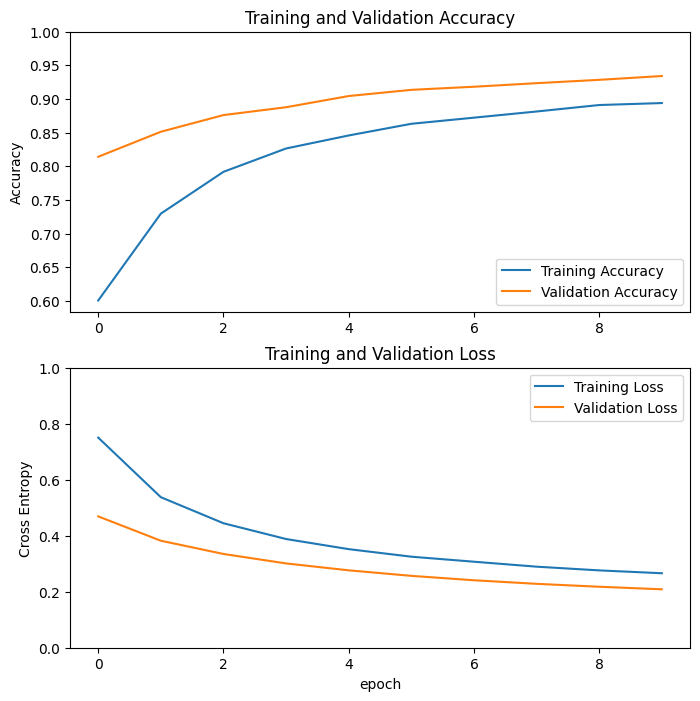

Let's select the best checkpoint based on accuracy:
model_epoch_01.keras      | Test: 0.5671 | Val: 0.8142 | Gap: 0.2471
model_epoch_02.keras      | Test: 0.5974 | Val: 0.8514 | Gap: 0.2540
model_epoch_03.keras      | Test: 0.6158 | Val: 0.8762 | Gap: 0.2603
model_epoch_04.keras      | Test: 0.6645 | Val: 0.8878 | Gap: 0.2233
model_epoch_05.keras      | Test: 0.6627 | Val: 0.9045 | Gap: 0.2418
model_epoch_06.keras      | Test: 0.7004 | Val: 0.9137 | Gap: 0.2133
model_epoch_07.keras      | Test: 0.7013 | Val: 0.9183 | Gap: 0.2170
model_epoch_08.keras      | Test: 0.7114 | Val: 0.9236 | Gap: 0.2122
model_epoch_09.keras      | Test: 0.7151 | Val: 0.9285 | Gap: 0.2134
model_epoch_10.keras      | Test: 0.7206 | Val: 0.9342 | Gap: 0.2136

Best checkpoint: model_epoch_10.keras with test accuracy = 0.7206
Start finetuning classifier
Number of layers in the base model:  154
Number of trainable variables in the model:  88
Epoch 11/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.6357

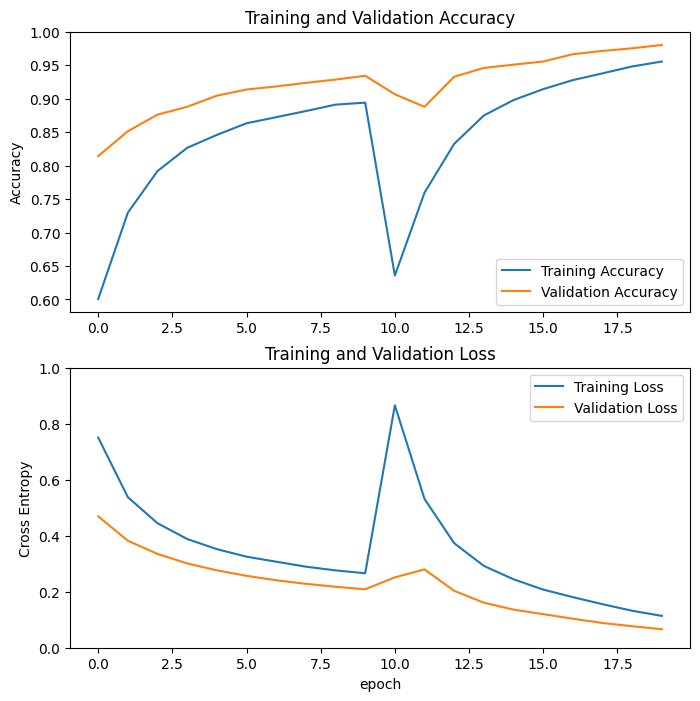

Let's select the best checkpoint based on accuracy:
model_epoch_11.keras      | Test: 0.6930 | Val: 0.9066 | Gap: 0.2136
model_epoch_12.keras      | Test: 0.6691 | Val: 0.8878 | Gap: 0.2187
model_epoch_13.keras      | Test: 0.7702 | Val: 0.9328 | Gap: 0.1625
model_epoch_14.keras      | Test: 0.8171 | Val: 0.9459 | Gap: 0.1288
model_epoch_15.keras      | Test: 0.8447 | Val: 0.9508 | Gap: 0.1061
model_epoch_16.keras      | Test: 0.8410 | Val: 0.9554 | Gap: 0.1144
model_epoch_17.keras      | Test: 0.8382 | Val: 0.9664 | Gap: 0.1281
model_epoch_18.keras      | Test: 0.8373 | Val: 0.9713 | Gap: 0.1340
model_epoch_19.keras      | Test: 0.8309 | Val: 0.9752 | Gap: 0.1443
model_epoch_20.keras      | Test: 0.8208 | Val: 0.9802 | Gap: 0.1594

Best checkpoint: model_epoch_15.keras with test accuracy = 0.8447


In [9]:
fine_tune(
    train_path=img_dataset_path / "training",
    val_path=img_dataset_path / "validation",
    test_path=img_dataset_path / "testing",
    batch_size=32,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=preprocess_input,
    dropout=0.6,
    lr_classifier=10e-5,
    epochs_classifier=10,
    cp_path=project_path / "models" / model_label / "cp",
    fine_tune_at=70,
    lr_finetune=10e-7,
    epochs_finetune=10,
    model_save_path=project_path / "models" / model_label,
    last_conv_layer_name=last_conv_layer_name,
)